**CS7357 – Neural Networks and Deep Learning**  
**Assignment 2:** CIFAR-10 Image Classification using Convolutional Neural Network (CNN)  
**Name:** Sukumar Muthusamy  
**Section:** W01  
**Term:** Fall 2025  
**Submission Date:** 10/23/2025

## Task 1: Load Dataset and Scale the Pixels

In this step, the CIFAR-10 dataset is loaded directly from the Keras library using the cifar10.load_data() function. The dataset consists of 60,000 color images of size 32 × 32 pixels, categorized into 10 classes (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck). Among these, 50,000 images are used for training and 10,000 for testing.

To verify that the dataset is loaded correctly, I print the shapes of the training and test sets along with the label dimensions. Each image contains three color channels (RGB) with pixel values ranging from 0 to 255. To prepare the data for efficient neural-network training, I scale all pixel values to the range [0, 1] by dividing them by 255. This normalization step ensures faster convergence and numerical stability during model training.

After scaling, I also reshape the label arrays to a one-dimensional form for easier handling in later tasks such as model training and evaluation.


In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Set random seed for reproducibility
RANDOM_SEED = 13
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

# To load CIFAR-10 dataset (50,000 train, 10,000 test), images are 32x32 RGB
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# To print the dataset shapes and verify load
print("\n" + "="*80)
print("\033[1mDataset Loaded (CIFAR-10): Shapes and Basic Info\033[0m")
print("="*80)
print(f"X_train shape: {X_train.shape} | dtype: {X_train.dtype}")
print(f"y_train shape: {y_train.shape} | dtype: {y_train.dtype}")
print(f"X_test  shape: {X_test.shape}  | dtype: {X_test.dtype}")
print(f"y_test  shape: {y_test.shape}  | dtype: {y_test.dtype}")

# To reshape labels to 1D for consistency with later processing/printing
y_train = y_train.reshape(-1)
y_test  = y_test.reshape(-1)
print(f"\nLabels reshaped -> y_train: {y_train.shape}, y_test: {y_test.shape}")

# To print pixel statistics BEFORE scaling (sanity check)
print("\n" + "="*80)
print("\033[1mPixel Statistics BEFORE Scaling\033[0m")
print("="*80)
print(f"Train min/max: {X_train.min()} / {X_train.max()}")
print(f"Test  min/max: {X_test.min()} / {X_test.max()}")
print(f"Sample pixel mean (train): {X_train.mean():.4f}")

# To scale the pixel values to [0, 1] and convert to float32
X_train = (X_train.astype('float32') / 255.0)
X_test  = (X_test.astype('float32')  / 255.0)

# To verify pixel stats AFTER scaling
print("\n" + "="*30)
print("\033[1mPixel values after scaling:\033[0m")
print("="*30)
print(f"Train min/max: {X_train.min():.4f} / {X_train.max():.4f}")
print(f"Test  min/max: {X_test.min():.4f} / {X_test.max():.4f}")
print(f"Mean value (train): {X_train.mean():.4f}")
print(f"dtype: {X_train.dtype}")

# To keep class names handy for later tasks (displaying images, confusion matrix, etc.)
CLASS_NAMES = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]
print("\nClass names loaded.")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step

Dataset Loaded (CIFAR-10): Shapes and Basic Info
X_train shape: (50000, 32, 32, 3) | dtype: uint8
y_train shape: (50000, 1) | dtype: uint8
X_test  shape: (10000, 32, 32, 3)  | dtype: uint8
y_test  shape: (10000, 1)  | dtype: uint8

Labels reshaped -> y_train: (50000,), y_test: (10000,)

Pixel Statistics BEFORE Scaling
Train min/max: 0 / 255
Test  min/max: 0 / 255
Sample pixel mean (train): 120.7076

Pixel values after scaling:
Train min/max: 0.0000 / 1.0000
Test  min/max: 0.0000 / 1.0000
Mean value (train): 0.4734
dtype: float32

Class names loaded.


## Task 2: Display Some Images from the Dataset

In this step, I display a few sample images from the CIFAR-10 dataset to visually verify that the data has been loaded correctly. Each image in the dataset is a 32 × 32 color image with three RGB channels, and it belongs to one of ten predefined classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck.

To perform this visualization, I use the matplotlib library to plot multiple training images in a grid layout. Along with each image, the corresponding class label is displayed as the title to confirm that the images and labels are correctly aligned. This step helps in gaining an initial understanding of the dataset distribution and variety across different categories before training the neural network model.


Displaying Sample Images from the CIFAR-10 Dataset:


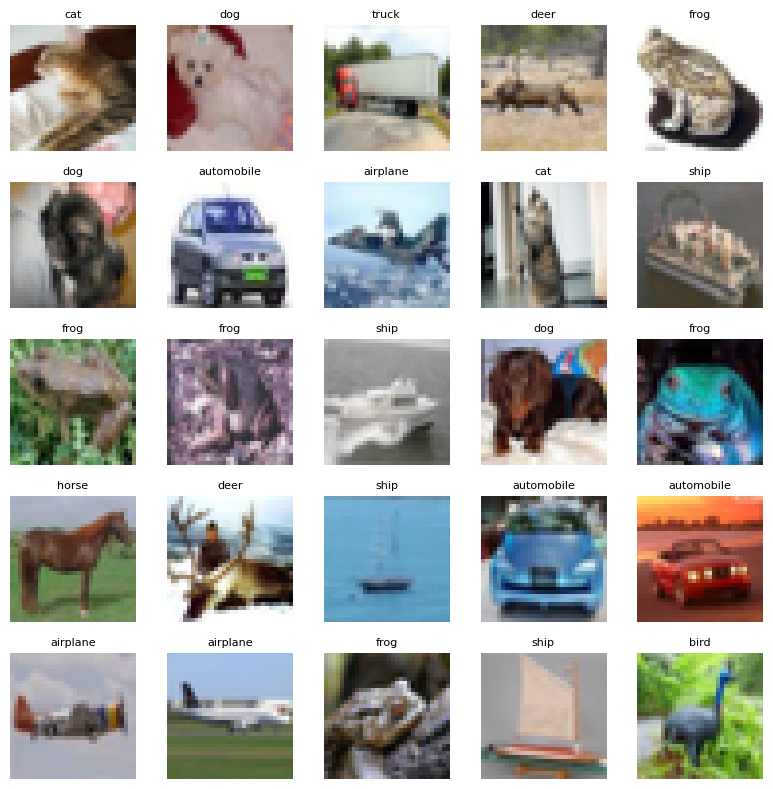


Displayed 25 sample images with class labels to verify dataset loading.


In [ ]:
import matplotlib.pyplot as plt

# To set random seed for consistent image sampling
RANDOM_SEED = 13
np.random.seed(RANDOM_SEED)

# To display a few random training images with their corresponding class labels
print("\n" + "="*100)
print("\033[1mDisplaying Sample Images from the CIFAR-10 Dataset:\033[0m")
print("="*100)

# To define number of images to display (e.g., 25 images in a 5x5 grid)
num_images = 25
indices = np.random.choice(len(X_train), num_images, replace=False)

# To create a figure for plotting
plt.figure(figsize=(8, 8))

# To loop through selected images and display them
for i, idx in enumerate(indices):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[idx])
    plt.title(CLASS_NAMES[y_train[idx]], fontsize=8)
    plt.axis('off')

# To adjust the spacing between subplots
plt.tight_layout()
plt.show()

# To confirm successful display
print("\nDisplayed", num_images, "sample images with class labels to verify dataset loading.")

## Task 3: Define the CNN Design and Fit the Model

In this step, I design and train a convolutional neural network (CNN) to perform image classification on the CIFAR-10 dataset. Unlike fully connected neural networks, CNNs are specifically designed to capture spatial hierarchies and local features in images by applying convolutional filters that learn edges, textures, and shapes. This makes them highly effective for visual recognition tasks.

The CNN model used in this assignment consists of two convolutional blocks followed by a fully connected dense layer and an output layer. Each convolutional block includes two convolution layers with ReLU activation, a max-pooling layer to reduce spatial dimensions, and a dropout layer for regularization. After the convolutional blocks, the feature maps are flattened and passed through a dense layer with 512 neurons (ReLU activation) and a dropout layer before reaching the final softmax output layer with 10 neurons corresponding to the CIFAR-10 classes.

The model is compiled using the **Adam optimizer** and **sparse categorical cross-entropy as the loss function**, while tracking accuracy as the primary performance metric. The network is trained over multiple epochs with a validation split of 10% to monitor both training and validation performance. This setup helps detect overfitting early and ensures stable convergence.

After training, the model will be evaluated on the test dataset to compute its accuracy, and the results will later be compared with the neural network model designed in Assignment 2 to analyze performance differences.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

# To build the CNN model (two Conv blocks -> Dense -> Output)
def build_cnn_model(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential(name="CIFAR10_CNN")

    # ---- Conv Block 1 ----
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))

    # ---- Conv Block 2 ----
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))

    # ---- Dense Head ----
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))

    # ---- Output Layer ----
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# To instantiate the model
cnn_model = build_cnn_model(input_shape=(32, 32, 3), num_classes=10)

# To print the model summary
print("\n" + "="*80)
print("\033[1mCNN Model Summary:\033[0m")
print("="*80)
cnn_model.summary()

# To compile the model (optimizer, loss, metrics)
cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',   # labels are integer-encoded (0-9)
    metrics=['accuracy']
)

# To configure the training parameters
BATCH_SIZE = 64
EPOCHS = 25
VAL_SPLIT = 0.10

# To use EarlyStopping for preventing overfitting and restoring the best weights
early_stop = callbacks.EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# To train the model (fit)
print("\n" + "="*80)
print("\033[1mTraining the CNN Model:\033[0m")
print("="*80)
history = cnn_model.fit(
    X_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_split=VAL_SPLIT,
    shuffle=True,
    callbacks=[early_stop],
    verbose=1
)

# To extract and print the key training results
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
best_val_acc = max(history.history['val_accuracy'])
best_epoch = history.history['val_accuracy'].index(best_val_acc) + 1  # 1-based index

print("\n" + "="*80)
print("\033[1mTraining Summary (CNN):\033[0m")
print("="*80)
print(f"Final Train Accuracy: {train_acc:.4f}")
print(f"Final Val   Accuracy: {val_acc:.4f}")
print(f"Best Val Accuracy: {best_val_acc:.4f} (at epoch {best_epoch})")

# To save the trained model for later evaluation and comparison
cnn_model.save("cnn_cifar10_model.keras")
print("\nModel saved as cnn_cifar10_model.keras")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



CNN Model Summary:


Model: "CIFAR10_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,168,362 (8.27 MB)

 Trainable params: 2,168,362 (8.27 MB)

 Non-trainable params: 0 (0.00 B)


Training the CNN Model:
Epoch 1/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.3134 - loss: 1.8495 - val_accuracy: 0.5816 - val_loss: 1.1656
Epoch 2/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5622 - loss: 1.2133 - val_accuracy: 0.6726 - val_loss: 0.9382
Epoch 3/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6411 - loss: 1.0072 - val_accuracy: 0.7166 - val_loss: 0.8210
Epoch 4/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6842 - loss: 0.8894 - val_accuracy: 0.7320 - val_loss: 0.7716
Epoch 5/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7222 - loss: 0.8003 - val_accuracy: 0.7402 - val_loss: 0.7485
Epoch 6/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7350 - loss: 0.7449 - val_accuracy: 0.7578 - val_loss: 0.7142
Epoch 7/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7543 - loss: 0.6908 - val_accuracy: 0.7594 - val_loss: 0.6986
Epoch 8/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7739 - loss

## Task 4: Analyze the Model by Computing Test Accuracy

In this step, I evaluate the trained CNN model on the CIFAR-10 test dataset to measure its performance on unseen data. The test set contains 10,000 color images belonging to the same ten categories used during training and validation. Using the evaluate() function, I compute the test loss and test accuracy, which indicate how well the model generalizes to new images.

The computed test accuracy represents the percentage of correctly classified images out of all test samples. This metric provides an unbiased estimate of the model’s real-world performance since the test images were not used during any stage of training or validation.

After obtaining the test accuracy, I compare it with the validation accuracy recorded during training to assess model consistency. A small difference between validation and test accuracy confirms that the model has generalized well without overfitting. Finally, the test accuracy of this CNN model will later be compared with the neural-network model from Assignment 2 to highlight the improvement achieved by using convolutional layers for image classification.

In [ ]:
# To evaluate the model on the test dataset (10,000 unseen images)
print("\n" + "="*80)
print("\033[1mEvaluating CNN Model on Test Dataset:\033[0m")
print("="*80)
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test, verbose=1)

# To print the evaluation results
print("\n" + "="*80)
print("\033[1mTest Evaluation Results:\033[0m")
print("="*80)
print(f"Test Accuracy : {test_accuracy:.4f}")
print(f"Test Loss     : {test_loss:.4f}")

# To compare with validation accuracy (recorded during training)
# Note: best_val_acc variable captured from training phase
print("\n" + "="*80)
print("\033[1mComparison Summary (Validation vs Test Accuracy):\033[0m")
print("="*80)
print(f"Best Validation Accuracy : {best_val_acc:.4f}")
print(f"Test Accuracy            : {test_accuracy:.4f}")

# To analyze the generalization behavior
if abs(best_val_acc - test_accuracy) <= 0.02:
    print("\nModel generalizes well (validation and test accuracies are consistent).")
elif best_val_acc > test_accuracy:
    print("\nModel shows mild overfitting (slightly higher validation accuracy).")
else:
    print("\nModel slightly underfit (test accuracy higher than validation, which is rare).")


Evaluating CNN Model on Test Dataset:
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7741 - loss: 0.7394

Test Evaluation Results:
Test Accuracy : 0.7776
Test Loss     : 0.7427

Comparison Summary (Validation vs Test Accuracy):
Best Validation Accuracy : 0.7932
Test Accuracy            : 0.7776

Model generalizes well (validation and test accuracies are consistent).


## Task 5: Display a Confusion Matrix

In this step, I evaluate the CNN model’s classification results by displaying a confusion matrix for the CIFAR-10 test dataset. The matrix shows how many images from each actual class were correctly or incorrectly predicted by the model. A heatmap visualization is used to make it easier to identify where misclassifications occur. Higher values along the diagonal represent correct predictions, while off-diagonal cells highlight the categories that the model tends to confuse.


Generating Predictions on Test Dataset:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Displaying Confusion Matrix (CIFAR-10):


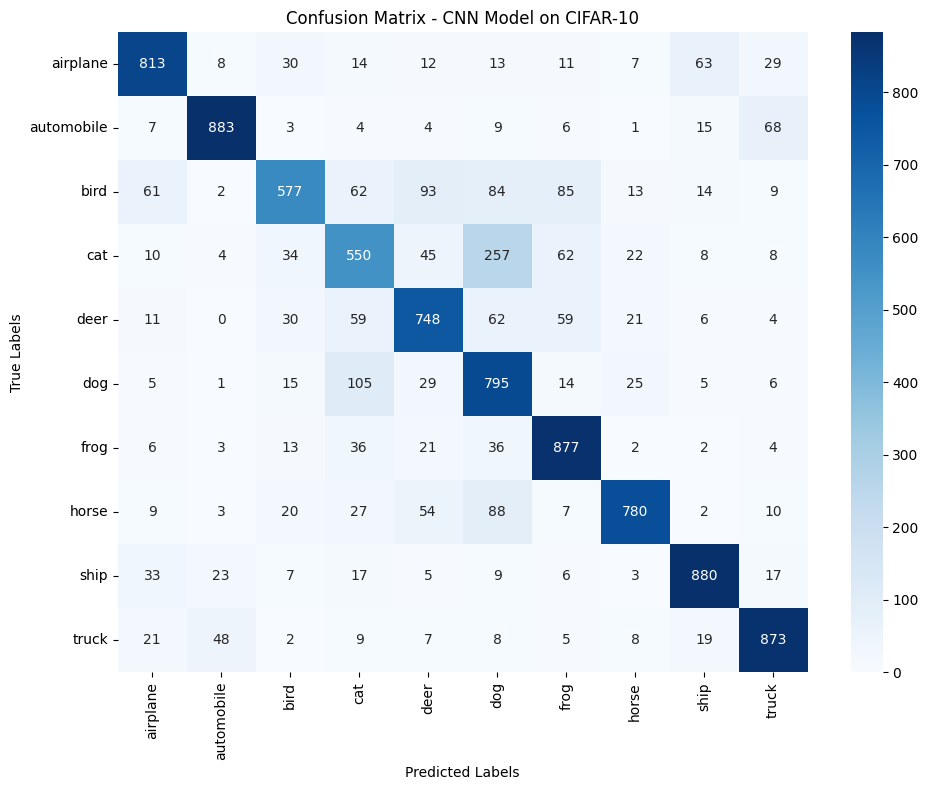


Confusion matrix displayed successfully for CNN model.


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# To generate the predictions on the test dataset
print("\n" + "="*80)
print("\033[1mGenerating Predictions on Test Dataset:\033[0m")
print("="*80)
y_pred_probs = cnn_model.predict(X_test, verbose=1)
y_pred = y_pred_probs.argmax(axis=1)   # To get predicted class indices

# To compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# To display the confusion matrix as a heatmap
print("\n" + "="*80)
print("\033[1mDisplaying Confusion Matrix (CIFAR-10):\033[0m")
print("="*80)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - CNN Model on CIFAR-10")
plt.tight_layout()
plt.show()

# To confirm the display completion
print("\nConfusion matrix displayed successfully for CNN model.")

## Additional Step: Train the Neural Network Model (from Assignment 2) on CIFAR-10 Dataset

In this step, I reuse the fully connected neural network (NN) model implemented in Assignment 2 and train it on the CIFAR-10 dataset for comparison with the CNN model.
The purpose of this step is to analyze how a traditional dense neural network performs on raw color images compared to a convolutional neural network that is specifically designed for image data.

The same preprocessing steps applied earlier are used here: scaling the pixel values to the range [0, 1] and reshaping the data to fit the NN’s input structure.
After training, I record the NN’s test accuracy and compare it with the CNN’s test accuracy to highlight the improvement achieved through convolutional feature extraction and spatial learning.

In [ ]:
from sklearn.neural_network import MLPClassifier
import time
import numpy as np

# To flatten the 32x32x3 images into 1D vectors of length 3072
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat  = X_test.reshape(X_test.shape[0], -1)

# To flatten labels (since CIFAR-10 labels are 2D arrays)
y_train_flat = y_train.ravel()
y_test_flat  = y_test.ravel()

# Function to train model epoch by epoch and track accuracies
def train_model_with_tracking(model, X_train, y_train, X_test, y_test, epochs=100):
    train_accuracies = []
    test_accuracies = []
    classes = np.unique(y_train)
    start_time = time.time()

    for epoch in range(epochs):
        if epoch == 0:
            model.partial_fit(X_train, y_train, classes=classes)
        else:
            model.partial_fit(X_train, y_train)

        train_acc = model.score(X_train, y_train)
        test_acc = model.score(X_test, y_test)
        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)

        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1}/{epochs} - Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")

    training_time = time.time() - start_time
    return train_accuracies, test_accuracies, training_time


# Design 1: Single Hidden Layer with 128 neurons
print("\n" + "="*60)
print("\033[1mDesign 1: Single Hidden Layer (128 neurons)\033[0m")
print("="*60)
model1 = MLPClassifier(hidden_layer_sizes=(128,), activation='logistic', solver='adam',
                       max_iter=1, random_state=RANDOM_SEED)
train_acc1, test_acc1, time1 = train_model_with_tracking(model1, X_train_flat, y_train_flat,
                                                         X_test_flat, y_test_flat, epochs=100)
print(f"\nTraining completed in {time1:.2f} seconds")
print(f"Final Train Accuracy: {train_acc1[-1]:.4f}")
print(f"Final Test  Accuracy: {test_acc1[-1]:.4f}")


# Design 2: Two Hidden Layers (128, 64 neurons)
print("\n" + "="*60)
print("\033[1mDesign 2: Two Hidden Layers (128, 64 neurons)\033[0m")
print("="*60)
model2 = MLPClassifier(hidden_layer_sizes=(128, 64), activation='logistic', solver='adam',
                       max_iter=1, random_state=RANDOM_SEED)
train_acc2, test_acc2, time2 = train_model_with_tracking(model2, X_train_flat, y_train_flat,
                                                         X_test_flat, y_test_flat, epochs=100)
print(f"\nTraining completed in {time2:.2f} seconds")
print(f"Final Train Accuracy: {train_acc2[-1]:.4f}")
print(f"Final Test  Accuracy: {test_acc2[-1]:.4f}")


# Design 3: Three Hidden Layers (256, 128, 64 neurons)
print("\n" + "="*60)
print("\033[1mDesign 3: Three Hidden Layers (256, 128, 64 neurons)\033[0m")
print("="*60)
model3 = MLPClassifier(hidden_layer_sizes=(256, 128, 64), activation='logistic', solver='adam',
                       max_iter=1, random_state=RANDOM_SEED)
train_acc3, test_acc3, time3 = train_model_with_tracking(model3, X_train_flat, y_train_flat,
                                                         X_test_flat, y_test_flat, epochs=100)
print(f"\nTraining completed in {time3:.2f} seconds")
print(f"Final Train Accuracy: {train_acc3[-1]:.4f}")
print(f"Final Test  Accuracy: {test_acc3[-1]:.4f}")


Design 1: Single Hidden Layer (128 neurons)
Epoch 10/100 - Train Acc: 0.4891, Test Acc: 0.4646
Epoch 20/100 - Train Acc: 0.5303, Test Acc: 0.4803
Epoch 30/100 - Train Acc: 0.5504, Test Acc: 0.4897
Epoch 40/100 - Train Acc: 0.5656, Test Acc: 0.4925
Epoch 50/100 - Train Acc: 0.5758, Test Acc: 0.4882
Epoch 60/100 - Train Acc: 0.5860, Test Acc: 0.4899
Epoch 70/100 - Train Acc: 0.5905, Test Acc: 0.4826
Epoch 80/100 - Train Acc: 0.5981, Test Acc: 0.4871
Epoch 90/100 - Train Acc: 0.6003, Test Acc: 0.4885
Epoch 100/100 - Train Acc: 0.5951, Test Acc: 0.4838

Training completed in 399.85 seconds
Final Train Accuracy: 0.5951
Final Test  Accuracy: 0.4838

Design 2: Two Hidden Layers (128, 64 neurons)
Epoch 10/100 - Train Acc: 0.4730, Test Acc: 0.4582
Epoch 20/100 - Train Acc: 0.5223, Test Acc: 0.4831
Epoch 30/100 - Train Acc: 0.5437, Test Acc: 0.4899
Epoch 40/100 - Train Acc: 0.5446, Test Acc: 0.4827
Epoch 50/100 - Train Acc: 0.5661, Test Acc: 0.4934
Epoch 60/100 - Train Acc: 0.5781, Test Acc: 0.

In [ ]:
# ===========================================================================
# CNN vs NN: Combined Summary (Accuracies & Improvement)
# ===========================================================================

# To safely fetch the CNN metrics (This works whether variables already exist or not)
try:
    # If we still have 'history' and 'best_val_acc' from Task 3
    cnn_train_acc_last = float(history.history['accuracy'][-1]) if 'history' in globals() else None
    cnn_best_val_acc = float(best_val_acc) if 'best_val_acc' in globals() else None
except Exception:
    cnn_train_acc_last = None
    cnn_best_val_acc = None

# This is to always evaluate CNN on train/test to get current accuracies
_, cnn_train_acc_eval = cnn_model.evaluate(X_train, y_train, verbose=0)
try:
    cnn_test_acc = float(test_accuracy)  # from Task 4 if defined
except NameError:
    _, cnn_test_acc = cnn_model.evaluate(X_test, y_test, verbose=0)

# To prefer epoch-tracked train accuracy if available, else use evaluate()
cnn_train_acc = cnn_train_acc_last if cnn_train_acc_last is not None else cnn_train_acc_eval

# To pick a 'best NN' for comparison
nn_test_scores = {
    "Design 1": test_acc1[-1],
    "Design 2": test_acc2[-1],
    "Design 3": test_acc3[-1],
}
best_nn_name  = max(nn_test_scores, key=nn_test_scores.get)
best_nn_acc   = nn_test_scores[best_nn_name]

print("\n" + "="*80)
print("\033[1mCNN vs NN on CIFAR-10: Summary of Accuracies\033[0m")
print("="*80)
print(f"{'Model':28} {'Train Acc':>10} {'Val Acc*':>12} {'Test Acc':>12}")
print("-"*75)
print(f"{'NN - Design 1 (128)':<25} {train_acc1[-1]:>10.4f} {'-':>12} {test_acc1[-1]:>12.4f}")
print(f"{'NN - Design 2 (128,64)':<25} {train_acc2[-1]:>10.4f} {'-':>12} {test_acc2[-1]:>12.4f}")
print(f"{'NN - Design 3 (256,128,64)':<25} {train_acc3[-1]:>10.4f} {'-':>12} {test_acc3[-1]:>12.4f}")
print(f"{'CNN (2 conv blocks)':<25} {cnn_train_acc:>10.4f} "
      f"{(cnn_best_val_acc if cnn_best_val_acc is not None else float('nan')):>12.4f} {cnn_test_acc:>12.4f}")

print("\n*Val Acc is shown for CNN only (from training).")

# Improvement calculation
abs_gain = cnn_test_acc - best_nn_acc
rel_gain = (abs_gain / best_nn_acc) * 100.0
print("\n" + "="*80)
print("\033[1mCNN Improvement over Best NN\033[0m")
print("="*80)
print(f"Best NN: {best_nn_name}  |  Test Acc: {best_nn_acc:.4f}")
print(f"CNN Test Acc: {cnn_test_acc:.4f}")
print(f"Absolute Gain: {abs_gain:+.4f}")
print(f"Relative Gain: {rel_gain:+.2f}%")


CNN vs NN on CIFAR-10: Summary of Accuracies
Model                         Train Acc     Val Acc*     Test Acc
---------------------------------------------------------------------------
NN - Design 1 (128)           0.5951            -       0.4838
NN - Design 2 (128,64)        0.5987            -       0.4773
NN - Design 3 (256,128,64)     0.5878            -       0.4608
CNN (2 conv blocks)           0.8802       0.7932       0.7776

*Val Acc is shown for CNN only (from training).

CNN Improvement over Best NN
Best NN: Design 1  |  Test Acc: 0.4838
CNN Test Acc: 0.7776
Absolute Gain: +0.2938
Relative Gain: +60.73%
